In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Initial DF

In [2]:
df_cars = pd.read_csv("/home/pau/datasets/car_price_linear_reg.csv")

In [3]:
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


/tmp/ipykernel_311/15431140.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cars.corr())


<Axes: >

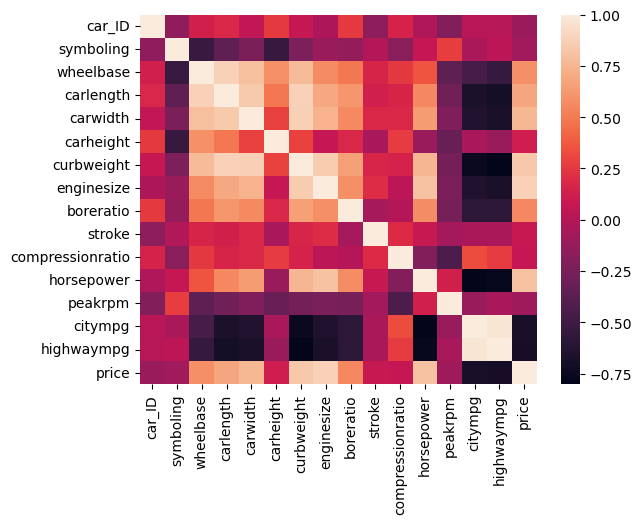

In [5]:
sns.heatmap(df_cars.corr())

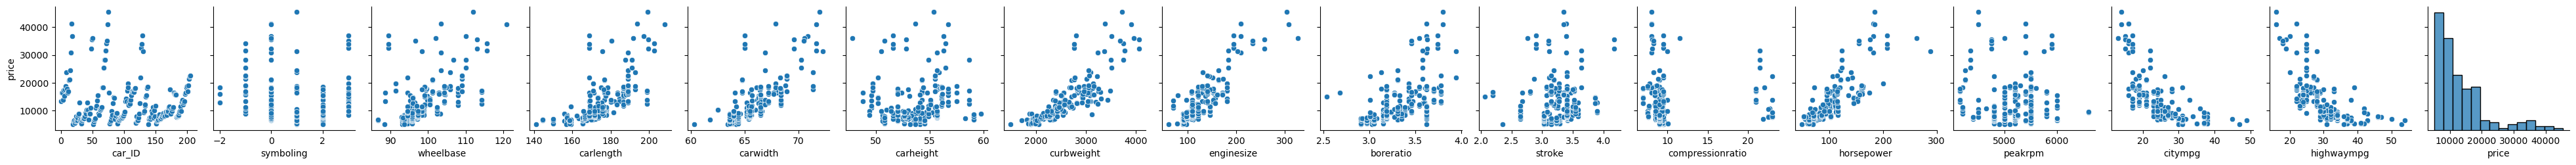

In [6]:
sns.pairplot(df_cars, y_vars="price")

## Clean DF

In [7]:
fuel = pd.get_dummies(df_cars["fueltype"], drop_first=True)
doors = pd.get_dummies(df_cars["doornumber"], drop_first=True)
aspiration = pd.get_dummies(df_cars["aspiration"], drop_first=True)
df = pd.concat([df_cars, fuel, doors, aspiration],axis=1)

In [8]:
df["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [9]:
mapping = {"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "three": 3, "twelve": 12}

In [10]:
df["cylindernumber"] = df["cylindernumber"].map(mapping)

In [11]:
df = df.select_dtypes(include=['number'])
df = df.drop(["car_ID"], axis=1)

In [12]:
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,two,turbo
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,1,0,1
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,1


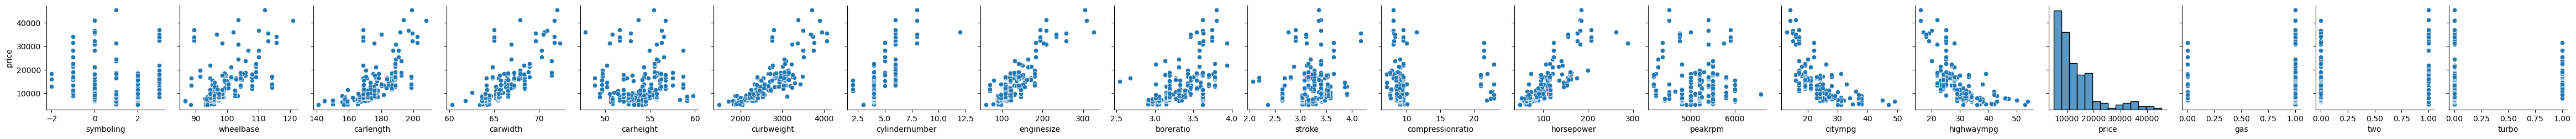

In [13]:
sns.pairplot(df, y_vars="price")

## Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = df.drop(["price"], axis=1)
y = df[["price"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
prediction = linear_model.predict(X_test)

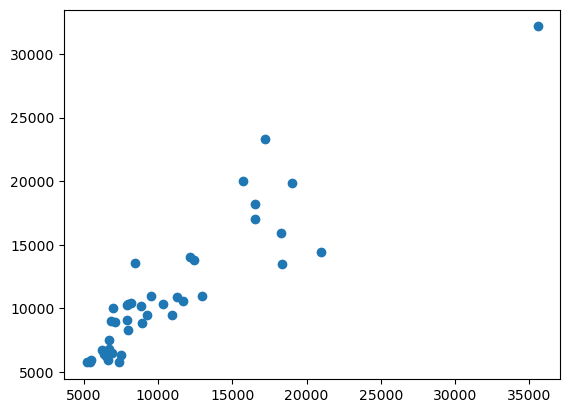

In [20]:
plt.scatter(y_test, prediction)

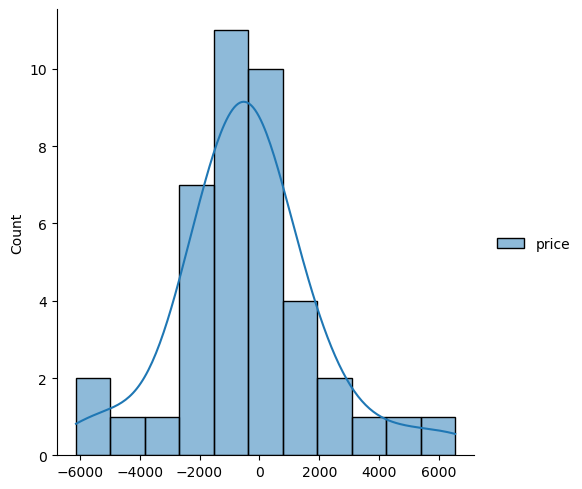

In [21]:
sns.displot((y_test-prediction), kde=True)

### Metrics

In [22]:
from sklearn import metrics

In [23]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R^: ", metrics.r2_score(y_test, prediction))

MAE:  1696.8324647159607
MSE:  5563061.561867708
RMSE:  2358.6143308874616
R^:  0.8339601720565322
